<a href="https://colab.research.google.com/github/ParkSlingshot/-/blob/main/Geochart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


#2. 한글패치

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
plt.rc('font', family='NanumBarunGothic')

#3. Load & Select Data

In [ ]:
file = '/gdrive/MyDrive/data/data_2020.csv'
data = pd.read_csv(file)

# Bubble, 도착영업소코드

In [ ]:
data_desttime_mean = data.groupby(by='도착영업소코드')['통행시간'].mean()
data_desttime_count = data.groupby(by='도착영업소코드')['통행시간'].count()

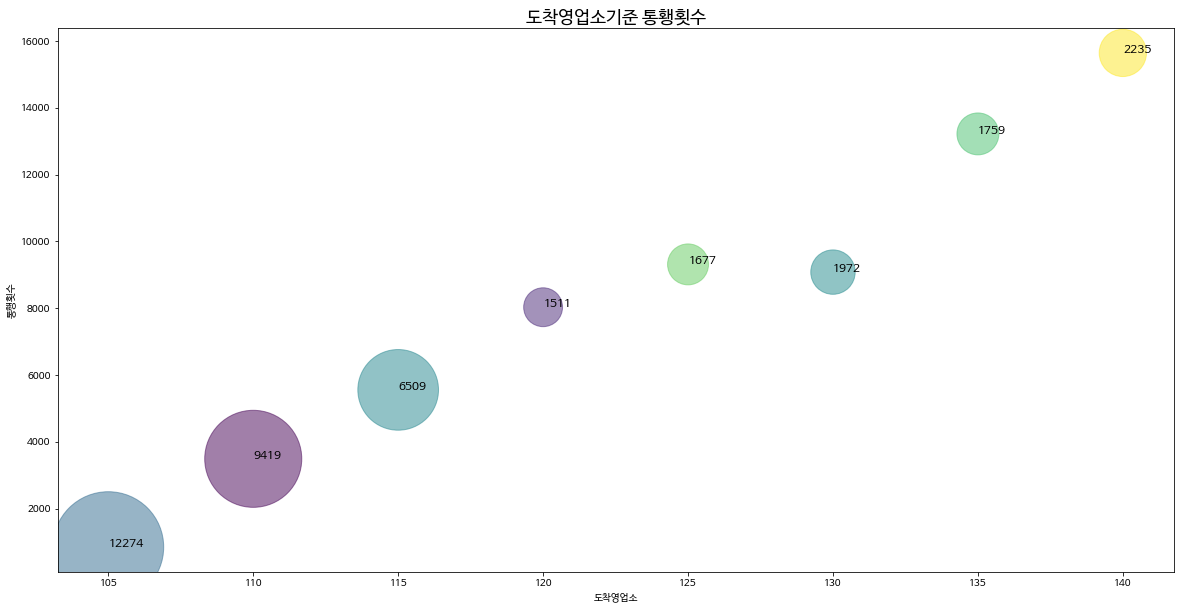

In [ ]:
x=data_desttime_mean.index
y=data_desttime_mean.values
s=data_desttime_count.values
c=np.random.rand(len(x))

plt.figure(figsize=(20,10))
plt.scatter(x,y, s=s, c=c, alpha=0.5)

for i,txt in enumerate(s):
  plt.annotate(txt,(x[i],y[i]),fontsize=12)

plt.title('도착영업소기준 통횅횟수', fontsize=18)
plt.xlabel('도착영업소')
plt.ylabel('통행횟수')
plt.show()

#4. Geo Chart

In [ ]:
import folium 

locations =[
            {"code" : 105, "name" : "기흥", "long" : 127.102439, "lat" : 37.222249},
            {"code" : 110, "name" : "목천", "long" : 127.230613, "lat" : 36.768046},
            {"code" : 115, "name" : "대전", "long" : 127.448328, "lat" : 36.361320},
            {"code" : 120, "name" : "황간", "long" : 127.901970, "lat" : 36.223015},
            {"code" : 125, "name" : "남구미", "long" : 128.371780, "lat" : 36.072653},
            {"code" : 130, "name" : "동김천", "long" : 128.175000, "lat" : 36.140000},
            {"code" : 135, "name" : "경주", "long" : 129.188771, "lat" : 35.809907},
            {"code" : 140, "name" : "부산", "long" : 129.105170, "lat" : 35.278705}
]

In [ ]:
idx = 1
location = locations[idx]
folium.Map(location = [location['lat'], location['long']],
           tiles='Stamen Toner', zoom_start=13
           )

In [ ]:
map =folium.Map(location = [location['lat'], location['long']],
           tiles='Stamen Terrain', zoom_start=13
           )
popup = str(location['code']) + '. ' + location['name']
folium.Marker([location['lat'],location['long']],
               popup = popup, tooltip = location['code'],
               icon=folium.Icon(color='red', icon = 'info-sign')).add_to(map)
map

In [ ]:
counts = s

In [ ]:
max_radius = 50    #가장 큰 원의 크기, 적당한 도시
radius = int(max_radius * counts[idx]/ counts.max())
color = 'green'
map = folium.Map(location = [location['lat'], location['long']],
           tiles='cartodbpositron', zoom_start=8
           )
popup = location['name'] + ':' + str(counts[idx])
folium.CircleMarker([location['lat'],location['long']],
              radius = radius, color = color , fill =True, fill_color = color, popup=popup).add_to(map)
map